# Arup University - Machine Learning & Artificial Intelligence
***

### 2019 - 2020 Individual assignment
# Road Traffic Accidents

# Clustering



__Gabor Jenei__
***

In [2]:
#Imports
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import dbscan
#from sklearn.cluster import AffinityPropagation

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import seaborn as sns

south_west_penisula_higway = ['E06000028', 'E06000029', 'E10000009','E10000027', 'E06000026', 'E06000027', 'E10000008', 'E06000052']
south_west_penisula_localauth = [496, 580, 581, 582, 583, 584, 585, 586,587,588,589, 596,605,606,607,608,609,610,635,640,641,642,643,644,645,646,647]

In [ ]:
data_dir = "H:\\ArupUni\\3_IndividualProject\\data\\accidentData\\"

In [ ]:
######### Read up accidents
accidents_2018 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv",low_memory=False)
accidents_2017 = pd.read_csv(r"http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Accidents_2017.zip",low_memory=False, compression='zip')
accidents_2016 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip",low_memory=False, compression='zip')
accidents_2015 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Accidents_2015.zip",low_memory=False, compression='zip')
accidents_2014 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Accidents_2014.zip",low_memory=False)

######### Read up casualties
casualties_2018 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2018.csv",low_memory=False)
casualties_2017 = pd.read_csv(r"http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Casualties_2017.zip",low_memory=False, compression='zip')
casualties_2016 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2016.zip",low_memory=False, compression='zip')
casualties_2015 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Casualties_2015.zip",low_memory=False, compression='zip')
casualties_2014 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Casualties_2014.zip",low_memory=False, compression='zip')

######### Read up vehicles
vehicles_2018 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2018.csv",low_memory=False)
vehicles_2017 = pd.read_csv(r"http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2017.zip",low_memory=False, compression='zip')
vehicles_2016 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip",low_memory=False, compression='zip')
vehicles_2015 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Vehicles_2015.zip",low_memory=False, compression='zip')
vehicles_2014 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Vehicles_2014.zip",low_memory=False, compression='zip')

df_accidents = accidents_2018.append([accidents_2017, accidents_2016, accidents_2015, accidents_2014])
df_vehicles = vehicles_2018.append([vehicles_2017, vehicles_2016, vehicles_2015, vehicles_2014])
df_casualties = casualties_2018.append([casualties_2017, casualties_2016, casualties_2015, casualties_2014])

In [3]:
df_accidents = pd.read_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\df_accidents.csv", low_memory=False)
df_casualties= pd.read_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\df_casualties.csv", low_memory=False)
df_vehicles= pd.read_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\df_vehicles.csv", low_memory=False)

In [4]:
casaualty_severity = df_casualties.groupby(['Accident_Index','Casualty_Severity']).size().unstack(fill_value=0)
casaualty_severity.rename(columns={1: "Fatal", 2: "Serious", 3: "Slight"}, inplace=True)

accidents_s1 = pd.merge(df_accidents, casaualty_severity, on="Accident_Index")
#accidents_s1.rename({1: "Fatal", 2: "Serious", 3: "Slight"}, axis='columns')
accidents_s1.columns

vehicles_type = df_vehicles.groupby(['Accident_Index','Vehicle_Type']).size().unstack(fill_value=0)
vehicles_type.rename(columns={1:"Pedal cycle", 2:"Motorcycle 50cc and under",3:"Motorcycle 125cc and under",
                              4:"Motorcycle over 125cc and up to 500cc",5:"Motorcycle over 500cc",8:"Taxi/Private hire car",
                              9:"Car",10:"Minibus (8 - 16 passenger seats)",11:"Bus or coach (17 or more pass seats)",
                              16:"Ridden horse",17:"Agricultural vehicle",18:"Tram",19:"Van / Goods 3.5 tonnes mgw or under",
                              20:"Goods over 3.5t. and under 7.5t",21:"Goods 7.5 tonnes mgw and over", 22:"Mobility scooter",
                              23:"Electric motorcycle",90:"Other vehicle",97:"Motorcycle - unknown cc",
                              98:"Goods vehicle - unknown weight",-1:"Data missing or out of range"}, inplace=True)

accidents_s2 = pd.merge(accidents_s1, vehicles_type, on="Accident_Index")
#accidents_s2.head().transpose()

***

# <font color=#6200EE> Clustering</font>

### K-Means

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [5]:
accidents_nonan = accidents_s2.dropna()
accidents_nonan["Accident_Index"].count()

635440

In [6]:
accidents_nonan = accidents_nonan[accidents_nonan["Local_Authority_(District)"].isin(south_west_penisula_localauth)]
accidents_nonan = accidents_nonan[accidents_nonan["Data missing or out of range"]==0]
accidents_nonan["Accident_Index"].count()

40591

In [7]:
accidents_nonan.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Fatal', 'Serious', 'Slight',
       'Data missing or out of range', 'Pedal cycle',
       'Motorcycle 50cc and under', 'Motorcycle 125cc and under',
       'Motorcycle over 125cc and up

In [8]:
colums_to_feature = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Accident_Severity',
                     'Day_of_Week', '1st_Road_Class', 'Speed_limit',
                     'Junction_Detail', '2nd_Road_Class',  
                     'Light_Conditions','Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Fatal', 'Serious', 'Slight',
       'Pedal cycle','Motorcycle 50cc and under', 'Motorcycle 125cc and under',
       'Motorcycle over 125cc and up to 500cc', 'Motorcycle over 500cc',
       'Taxi/Private hire car', 'Car', 'Minibus (8 - 16 passenger seats)',
       'Bus or coach (17 or more pass seats)', 'Ridden horse',
       'Agricultural vehicle', 'Tram', 'Van / Goods 3.5 tonnes mgw or under',
       'Goods over 3.5t. and under 7.5t', 'Goods 7.5 tonnes mgw and over',
       'Mobility scooter', 'Electric motorcycle', 'Other vehicle',
       'Motorcycle - unknown cc', 'Goods vehicle - unknown weight']

In [9]:
accidents_to_cluster = accidents_nonan.as_matrix(columns=colums_to_feature[3:])
accidents_to_cluster_norm = scale(accidents_to_cluster)
# accidents_to_cluster_norm_reduced = accidents_to_cluster_norm[::100]
# len(accidents_to_cluster_norm_reduced)

C:\Users\Gabor.Jenei\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [9]:
list_k = list(range(1,201,1))
sse =[]

In [10]:
for k in list_k:
    k_means = KMeans(n_clusters=k)
    k_means.fit(accidents_to_cluster_norm)
    sse.append(k_means.inertia_)

In [11]:
optimum_k_results = pd.DataFrame(data = sse, index=list_k, columns=["SSE"])
optimum_k_results.head()
optimum_k_results.to_csv("C:\\Projects\\0_Training\\AU_MLAI\\IndividualProject\\optimum_k_results.csv")

***
##### Elbow Method
"Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. We’ll use the geyser dataset and evaluate SSE for different values of k and see where the curve might form an elbow and flatten out."

In [10]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']
rcParams["figure.figsize"] = [16.4, 6]
rcParams["axes.titlesize"] = 16
rcParams["axes.labelsize"] = 'large'

In [11]:
optimum_k_results = pd.read_csv("C:\\Projects\\0_Training\\AU_MLAI\\IndividualProject\\optimum_k_results.csv", index_col=0)
list_k = optimum_k_results.index
sse = optimum_k_results["SSE"]

<Figure size 1152x432 with 0 Axes>

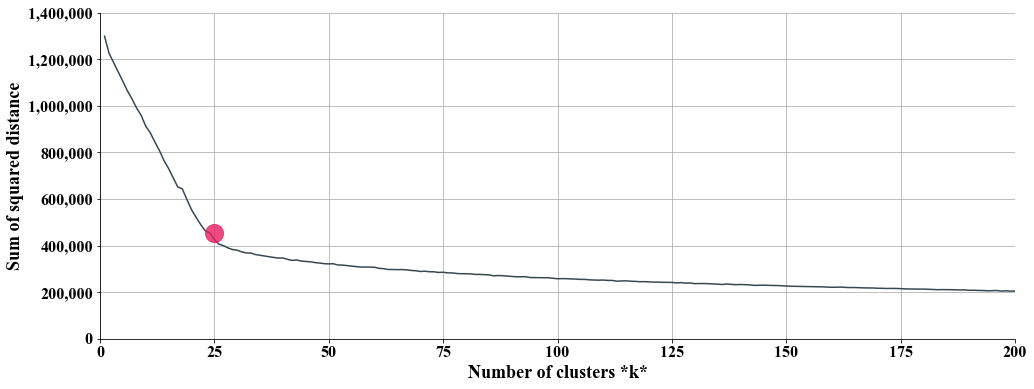

<Figure size 1152x432 with 0 Axes>

In [12]:
# Plot sse against k
#plt.figure(figsize=(16, 6))
rcParams["axes.titlesize"] = 16
rcParams["axes.labelsize"] = 'large'

fig, ax = plt.subplots()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(labelsize=16 )
ax.grid(True)

plt.plot(list_k, sse, '-', color='#37474F', markersize=6)
plt.plot(list_k[24], sse[24], '-o', color='#e91e63', markersize=18, alpha=0.8)

plt.ylim(0,1400000)
plt.xlim(0,200)
plt.xlabel(r'Number of clusters *k*', fontsize=18)
plt.ylabel('Sum of squared distance', fontsize=18);

plt.savefig("C:\\Projects\\0_Training\\AU_MLAI\\IndividualProject\\figures\\" + "Elbow_plot", dpi=150, format='jpg')
plt.figure(figsize=(16, 6))




### Mean Shift

In [15]:
ms = MeanShift()

In [16]:
ms.fit(accidents_to_cluster_norm)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [17]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 159


### Re- run K - means

In [13]:
k_means = KMeans(n_clusters=25)
k_means.fit(accidents_to_cluster_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=25, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
len(k_means.labels_)

40591

In [15]:
accidents_nonan["Cluster Label Number"] = k_means.labels_

In [ ]:
#### Checks

In [16]:
accidents_nonan.groupby(by="Cluster Label Number").count()["Accident_Index"]

Cluster Label Number
0     1723
1     2102
2       98
3     7082
4     7193
5     2557
6       74
7      726
8      452
9        1
10     918
11       5
12     614
13     110
14     567
15     201
16    4153
17     554
18     339
19    5071
20     592
21    2185
22     311
23      97
24    2866
Name: Accident_Index, dtype: int64

In [17]:
fig, ax = plt.subplots()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(labelsize=14)

ax.spines['left'].set_position(('data', -1))
plt.grid(which='major', axis='y', zorder=0)

#plt.ylim(0,1400000)
plt.xlim(-1,25)
plt.xlabel(r'Clusters *k* Number', fontsize=18)
plt.ylabel('Number of accident points', fontsize=18);
plt.xticks(range(0,25))

plt.bar(accidents_nonan.groupby(by="Cluster Label Number").count()["Accident_Index"].index,
   accidents_nonan.groupby(by="Cluster Label Number").count()["Accident_Index"],
       color='#37474F', zorder=3)

<BarContainer object of 25 artists>

In [18]:
k_means.cluster_centers_[0]

array([ 0.05125537, -0.01332841,  0.23054121, -0.16176832, -0.1996233 ,
        0.58166574,  3.82385309,  1.03411604,  0.16643314, -0.12065239,
       -0.14338412,  0.02297581, -0.07931574, -0.12538792, -0.12392725,
       -0.12277279, -0.16727324, -0.11871395,  0.11895044, -0.05168368,
       -0.13824817, -0.04221243, -0.09220404, -0.00496353, -0.13785264,
       -0.10476614, -0.16047593, -0.04919524, -0.01109933, -0.08802699,
       -0.0485205 , -0.07059616])

In [32]:
df_cluster_centers = pd.DataFrame(k_means.cluster_centers_, columns=['Day_of_Week', '1st_Road_Class', 'Speed_limit',
                     'Junction_Detail', '2nd_Road_Class',  
                     'Light_Conditions','Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Fatal', 'Serious', 'Slight',
       'Pedal cycle','Motorcycle 50cc and under', 'Motorcycle 125cc and under',
       'Motorcycle over 125cc and up to 500cc', 'Motorcycle over 500cc',
       'Taxi/Private hire car', 'Car', 'Minibus (8 - 16 passenger seats)',
       'Bus or coach (17 or more pass seats)', 'Ridden horse',
       'Agricultural vehicle', 'Tram', 'Van / Goods 3.5 tonnes mgw or under',
       'Goods over 3.5t. and under 7.5t', 'Goods 7.5 tonnes mgw and over',
       'Mobility scooter', 'Electric motorcycle', 'Other vehicle',
       'Motorcycle - unknown cc', 'Goods vehicle - unknown weight'])

In [35]:
df_cluster_centers.to_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\figures\ClusterCenters.csv")

In [19]:
accidents_nonan[accidents_nonan["Cluster Label Number"]==10].transpose()

86934          87786   \
Unnamed: 0                                           86934          87786   
Accident_Index                               2018440039018  2018440159453   
Location_Easting_OSGR                               429836         436187   
Location_Northing_OSGR                              108967         111990   
Longitude                                         -1.57727        -1.4867   
Latitude                                           50.8794        50.9062   
Police_Force                                            44             44   
Accident_Severity                                        2              3   
Number_of_Vehicles                                       1              2   
Number_of_Casualties                                     1              1   
Date                                            30/01/2018     30/04/2018   
Day_of_Week                                              3              2   
Time                                                 07:03          17:30   
Local_Authority_(District)                             496            496   
Local_Authority_(Highway)                        E10000014      E10000014   
1st_Road_Class                                           3              3   
1st_Road_Number                                        337            326   
Road_Type                                                6              6   
Speed_limit                                             60             40   
Junction_Detail                                          3              3   
Junction_Control                                         4              4   
2nd_Road_Class                                           6              6   
2nd_Road_Number                                          0              0   
Pedestrian_Crossing-Human_Control                        0              0   
Pedestrian_Crossing-Physical_Facilities                  0              0   
Light_Conditions                                         5              1   
Weather_Conditions                                       1              1   
Road_Surface_Conditions                                  1              1   
Special_Conditions_at_Site                               0              0   
Carriageway_Hazards                                      0              0   
Urban_or_Rural_Area                                      2              2   
Did_Police_Officer_Attend_Scene_of_Accident              1              1   
LSOA_of_Accident_Location                        E01023045      E01023085   
Fatal                                                    0              0   
Serious                                                  1              0   
Slight                                                   0              1   
Data missing or out of range                             0              0   
Pedal cycle                                              0              0   
Motorcycle 50cc and under                                0              0   
Motorcycle 125cc and under                               0              0   
Motorcycle over 125cc and up to 500cc                    0              0   
Motorcycle over 500cc                                    0              0   
Taxi/Private hire car                                    0              0   
Car                                                      0              1   
Minibus (8 - 16 passenger seats)                         0              0   
Bus or coach (17 or more pass seats)                     0              0   
Ridden horse                                             0              0   
Agricultural vehicle                                     0              0   
Tram                                                     0              0   
Van / Goods 3.5 tonnes mgw or under                      0              0   
Goods over 3.5t. and under 7.5t                          0              0   
Goods 7.5 tonnes mgw and over                   

In [55]:
accidents_nonan.groupby(by="Cluster Label Number").count().to_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\figures\Cluster_features_count.csv")

In [37]:
accidents_nonan.groupby(by="Cluster Label Number").sum()

Unnamed: 0  Location_Easting_OSGR  \
Cluster Label Number                                      
0                      199688877           5.315745e+08   
1                      244062442           6.841171e+08   
2                       11174145           3.247514e+07   
3                      820311899           2.243145e+09   
4                      834777861           2.317764e+09   
5                      294322716           8.130553e+08   
6                        8548369           2.396187e+07   
7                       85735819           2.396233e+08   
8                       53227530           1.531623e+08   
9                         118660           3.254280e+05   
10                     107048344           3.067683e+08   
11                        555692           1.312469e+06   
12                      71752076           1.973489e+08   
13                      12842578           3.636250e+07   
14                      67047222           1.880805e+08   
15                      22432444           5.466352e+07   
16                     483416697           1.416322e+09   
17                      64186533           1.827875e+08   
18                      39066405           1.022708e+08   
19                     585667254           1.577360e+09   
20                      69026270           1.954869e+08   
21                     253093287           6.726733e+08   
22                      36369843           1.064625e+08   
23                      10876008           2.816235e+07   
24                     332291129           9.410069e+08   

                      Location_Northing_OSGR     Longitude       Latitude  \
Cluster Label Number                                                        
0                                176210560.0  -5675.937669   87541.939232   
1                                210767304.0  -6419.103473  106764.714991   
2                                  9905220.0   -291.074618    4978.417971   
3                                764468410.0 -22508.770255  360189.729779   
4                                713915208.0 -22294.640616  365278.352790   
5                                258127497.0  -8079.530118  129887.383052   
6                                  8064444.0   -227.849404    3764.452473   
7                                 69024669.0  -2169.646709   36841.565461   
8                                 50542814.0  -1295.942067   23006.168699   
9                                    92702.0     -3.057945      50.729131   
10                               104401227.0  -2691.884931   46739.598369   
11                                  321191.0    -19.689272     252.306214   
12                                57718537.0  -1909.453076   31151.056724   
13                                12049056.0   -327.900124    5596.233979   
14                                55341187.0  -1681.157744   28786.036912   
15                                17431515.0   -765.405800   10183.092044   
16                               423927512.0 -11772.713222  211016.603347   
17                                60714372.0  -1657.458634   28185.745470   
18                                35245064.0  -1149.542258   17228.508838   
19                               476710292.0 -16514.369242  257270.635273   
20                                62041184.0  -1769.010431   30094.001382   
21                               199106908.0  -7211.453116  110794.386487   
22                                31513385.0   -875.924532   15799.976032   
23                                 7872269.0   -344.111590    4909.654693   
24                               295957470.0  -8634.801051  145646.856638   

                      Police_Force  Accident_Severity  Number_of_Vehicles  \
Cluster Label Number                                                        
0                            88801               4946                2864   
1                           108527               5416                3920   
2                             5064      

In [42]:
accidents_nonan.groupby(by="Cluster Label Number").sum().to_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\figures\Cluster_features_sum.csv")

In [38]:
accidents_nonan.groupby(by="Cluster Label Number").mean()

Unnamed: 0  Location_Easting_OSGR  \
Cluster Label Number                                         
0                     115896.040046          308516.844457   
1                     116109.629876          325460.065176   
2                     114021.887755          331378.948980   
3                     115830.542079          316738.960604   
4                     116054.200056          322224.984151   
5                     115104.699257          317972.339851   
6                     115518.500000          323809.108108   
7                     118093.414601          330059.606061   
8                     117760.022124          338854.712389   
9                     118660.000000          325428.000000   
10                    116610.396514          334170.213508   
11                    111138.400000          262493.800000   
12                    116860.058632          321415.190554   
13                    116750.709091          330568.136364   
14                    118249.068783          331711.679012   
15                    111604.199005          271957.835821   
16                    116401.805201          341035.941970   
17                    115860.167870          329941.406137   
18                    115240.132743          301683.861357   
19                    115493.443897          311054.974758   
20                    116598.429054          330214.359797   
21                    115832.167963          307859.647140   
22                    116944.832797          342323.109325   
23                    112123.793814          290333.505155   
24                    115942.473482          328334.587579   

                      Location_Northing_OSGR  Longitude   Latitude  \
Cluster Label Number                                                 
0                              102269.622751  -3.294218  50.807858   
1                              100269.887726  -3.053808  50.791967   
2                              101073.673469  -2.970149  50.800183   
3                              107945.271110  -3.178307  50.859888   
4                               99251.384402  -3.099491  50.782476   
5                              100949.353539  -3.159769  50.796786   
6                              108978.972973  -3.079046  50.870979   
7                               95075.301653  -2.988494  50.745958   
8                              111820.384956  -2.867128  50.898603   
9                               92702.000000  -3.057945  50.729131   
10                             113726.826797  -2.932337  50.914595   
11                              64238.200000  -3.937854  50.461243   
12                              94004.131922  -3.109858  50.734620   
13                             109536.872727  -2.980910  50.874854   
14                              97603.504409  -2.965005  50.769025   
15                              86723.955224  -3.807989  50.662149   
16                             102077.416807  -2.834749  50.810644   
17                             109592.729242  -2.991803  50.876797   
18                             103967.740413  -3.390980  50.821560   
19                              94007.156774  -3.256630  50.733708   
20                             104799.297297  -2.988193  50.834462   
21                              91124.443021  -3.300436  50.706813   
22                             101329.212219  -2.816478  50.803781   
23                              81157.412371  -3.547542  50.614997   
24                             103264.993022  -3.012841  50.818861   

                      Police_Force  Accident_Severity  Number_of_Vehicles  \
Cluster Label Number                                                        
0                        51.538595           2.870575            1.662217   
1                        51.630352           2.576594            1.864891   
2                        51.673469           2.663265            1.775510   
3                        51.435470           2.971053            1.826744 

In [41]:
accidents_nonan.groupby(by="Cluster Label Number").mean().to_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\figures\Cluster_features_mean.csv")

In [43]:
accidents_nonan.groupby(by="Cluster Label Number").std()

Unnamed: 0  Location_Easting_OSGR  \
Cluster Label Number                                        
0                      7388.664316           75811.297319   
1                      8630.793808           78231.139427   
2                      8330.472922           76760.483043   
3                      8135.675580           77539.953699   
4                      8494.748761           77580.113900   
5                      8728.710354           80358.110508   
6                      8372.755845           71373.227048   
7                      8363.150788           77289.877001   
8                      8570.229174           68351.636636   
9                              NaN                    NaN   
10                     8328.925142           73724.627900   
11                     8080.449140           28138.697246   
12                     8747.366795           81864.076809   
13                     8760.832802           86416.740680   
14                     7669.813279           76295.055344   
15                     6197.529119           68405.618638   
16                     8932.233876           73199.918500   
17                     8545.717025           74852.510940   
18                     7985.708143           79366.702269   
19                     8099.943048           77766.690537   
20                     7605.270661           68806.901778   
21                     7832.897696           81392.670779   
22                    10191.155281           75281.210006   
23                     7234.266650           75345.450044   
24                     8700.733425           81190.289002   

                      Location_Northing_OSGR  Longitude  Latitude  \
Cluster Label Number                                                
0                               39524.618274   1.065881  0.365282   
1                               37556.104674   1.101421  0.346269   
2                               40464.932480   1.079748  0.372032   
3                               39780.995515   1.091405  0.367777   
4                               38401.799037   1.091392  0.354127   
5                               37956.337558   1.130910  0.351002   
6                               39536.377917   1.005939  0.363281   
7                               34903.733622   1.087686  0.321750   
8                               35493.290416   0.963965  0.325887   
9                                        NaN        NaN       NaN   
10                              39294.501150   1.038978  0.361782   
11                              13828.130629   0.392642  0.129916   
12                              36781.472638   1.151058  0.340209   
13                              42901.443689   1.215068  0.397499   
14                              38709.820430   1.073369  0.355863   
15                              36674.715122   0.960447  0.339469   
16                              35327.205998   1.031238  0.324390   
17                              39126.060029   1.053799  0.360711   
18                              37093.480855   1.115671  0.345787   
19                              37533.952977   1.093205  0.346807   
20                              38977.078203   0.968418  0.357527   
21                              38219.488073   1.144011  0.353667   
22                              32628.606378   1.062080  0.299676   
23                              29486.028170   1.060572  0.273131   
24                              39604.620440   1.143044  0.365390   

                      Police_Force  Accident_Severity  Number_of_Vehicles  \
Cluster Label Number                                                        
0                         2.188315           0.335768            0.724312   
1                         2.798635           0.495178            0.572921   
2                         2.827609           0.555087            0.487591   
3                         2.501941           0.167668            0.847870   
4                         2.709677           0.208

In [44]:
accidents_nonan.groupby(by="Cluster Label Number").std().to_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\figures\Cluster_features_std.csv")

In [54]:
cols=['Fatal', 'Serious', 'Slight',
       'Pedal cycle','Motorcycle 50cc and under', 'Motorcycle 125cc and under',
       'Motorcycle over 125cc and up to 500cc', 'Motorcycle over 500cc',
       'Taxi/Private hire car', 'Car', 'Minibus (8 - 16 passenger seats)',
       'Bus or coach (17 or more pass seats)', 'Ridden horse',
       'Agricultural vehicle', 'Tram', 'Van / Goods 3.5 tonnes mgw or under',
       'Goods over 3.5t. and under 7.5t', 'Goods 7.5 tonnes mgw and over',
       'Mobility scooter', 'Electric motorcycle', 'Other vehicle',
       'Motorcycle - unknown cc', 'Goods vehicle - unknown weight',"Cluster Label Number"]


sns.heatmap(accidents_nonan[cols].groupby(by="Cluster Label Number").sum(), cmap=sns.color_palette("RdBu_r", 7))

### Try pairplot or that heat map thing from seaborn

In [20]:
colums_to_feature.append("Cluster Label Number")

accidents_pairplot = accidents_nonan[colums_to_feature[3:]]
accidents_pairplot.head()

Day_of_Week  1st_Road_Class  Speed_limit  Junction_Detail  \
86634            2               6         40.0                3   
86642            3               3         40.0                3   
86648            4               3         40.0                0   
86653            2               4         40.0                0   
86656            4               3         60.0                0   

       2nd_Road_Class  Light_Conditions  Weather_Conditions  \
86634               6                 6                   1   
86642               6                 6                   2   
86648              -1                 6                   4   
86653              -1                 7                   1   
86656              -1                 6                   1   

       Road_Surface_Conditions  Urban_or_Rural_Area  Fatal  ...  Tram  \
86634                        1                    2      0  ...     0   
86642                        2                    2      0  ...     0   
86648                        2                    2      0  ...     0   
86653                        1                    2      0  ...     0   
86656                        2                    2      0  ...     0   

       Van / Goods 3.5 tonnes mgw or under  Goods over 3.5t. and under 7.5t  \
86634                                    0                                0   
86642                                    0                                0   
86648                                    0                                0   
86653                                    0                                0   
86656                                    0                                0   

       Goods 7.5 tonnes mgw and over  Mobility scooter  Electric motorcycle  \
86634                              0                 0                    0   
86642                              0                 0                    0   
86648                              0                 0                    0   
86653                              0                 0                    0   
86656                              0                 0                    0   

       Other vehicle  Motorcycle - unknown cc  Goods vehicle - unknown weight  \
86634              0                        0                               0   
86642              0                        0                               0   
86648              0                        0                               0   
86653              0                        0                               0   
86656              0                        0                               0   

       Cluster Label Number  
86634                     4  
86642                     4  
86648                     5  
86653                     3  
86656                     5  

[5 rows x 33 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


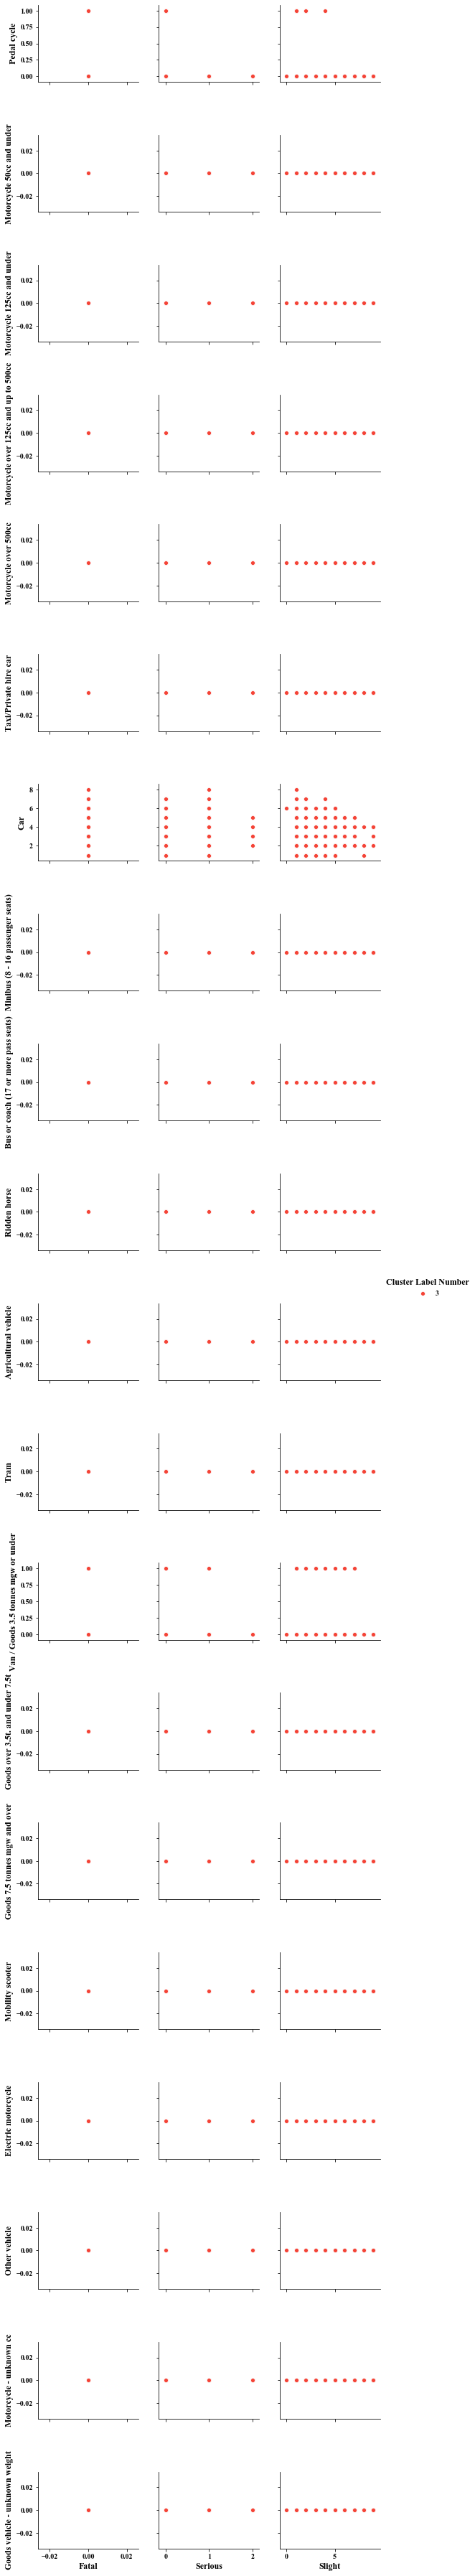

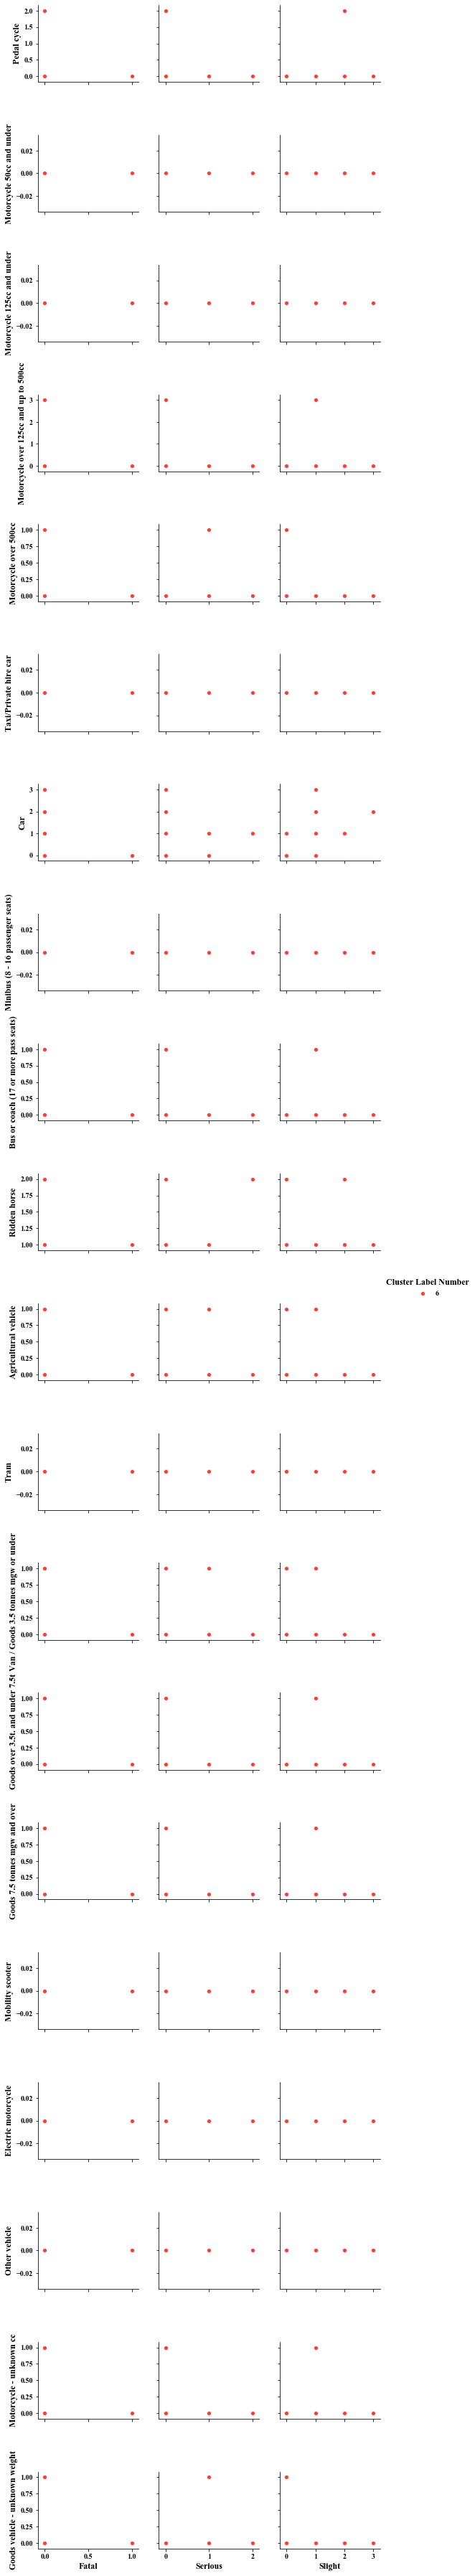

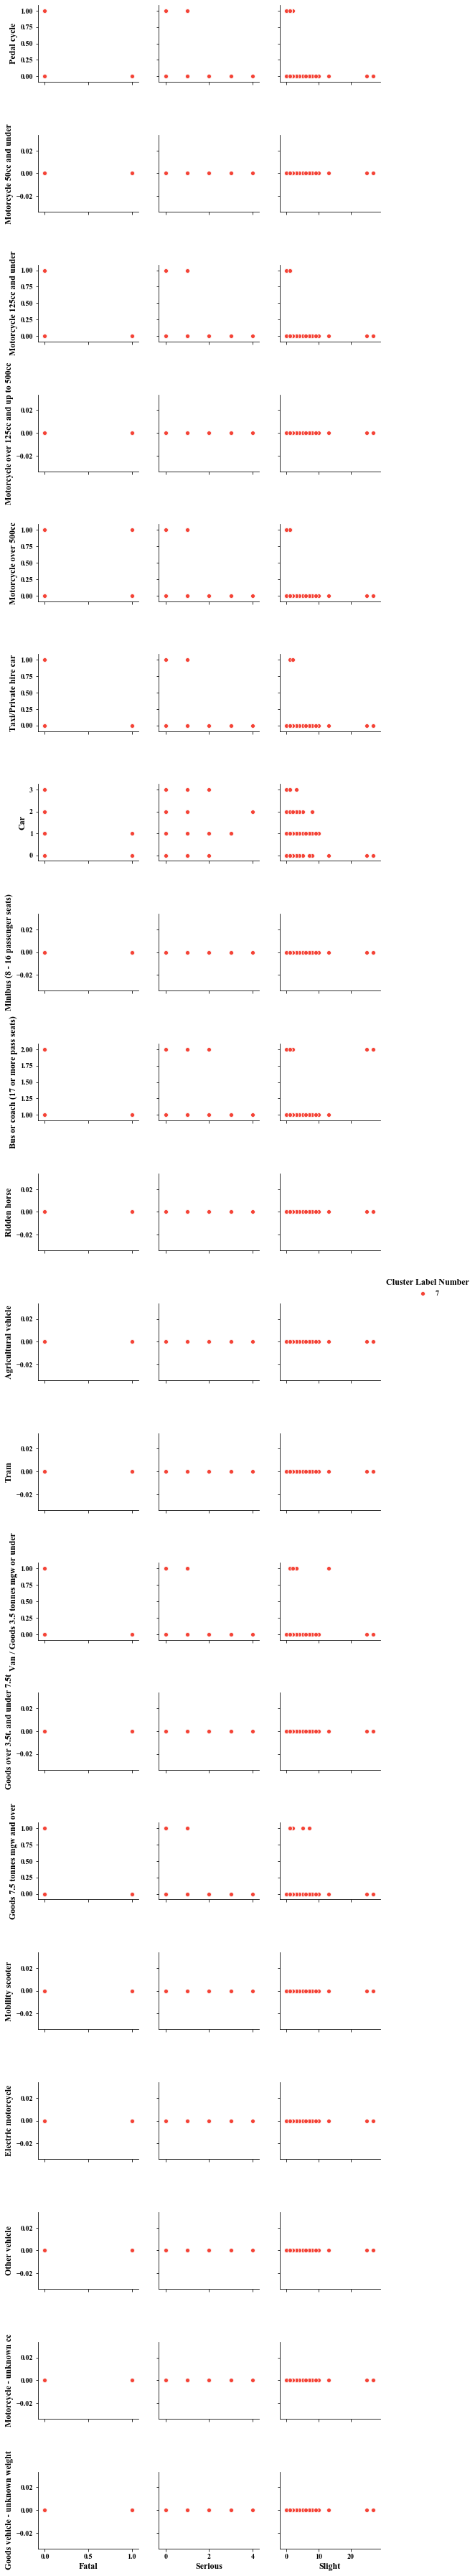

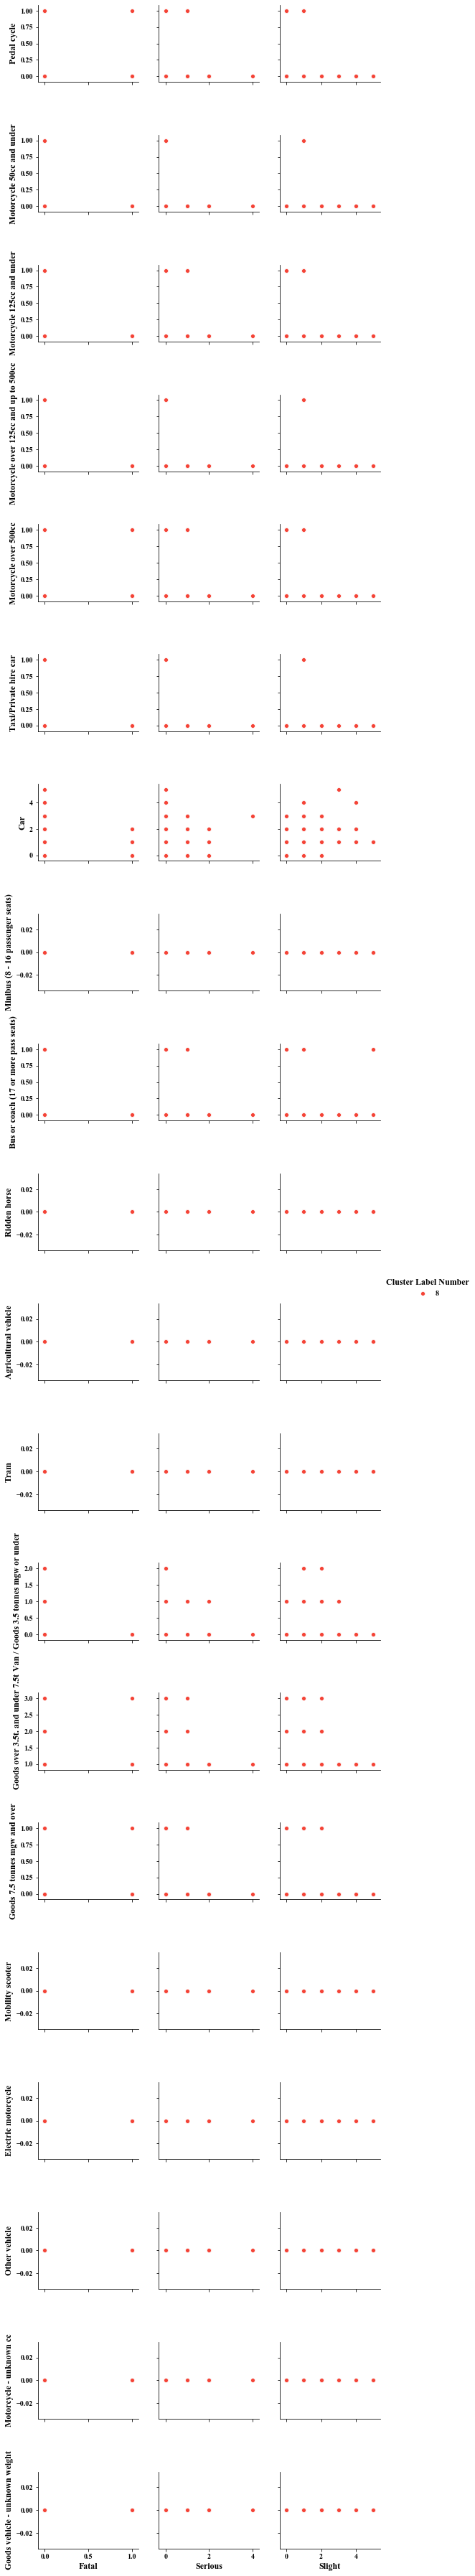

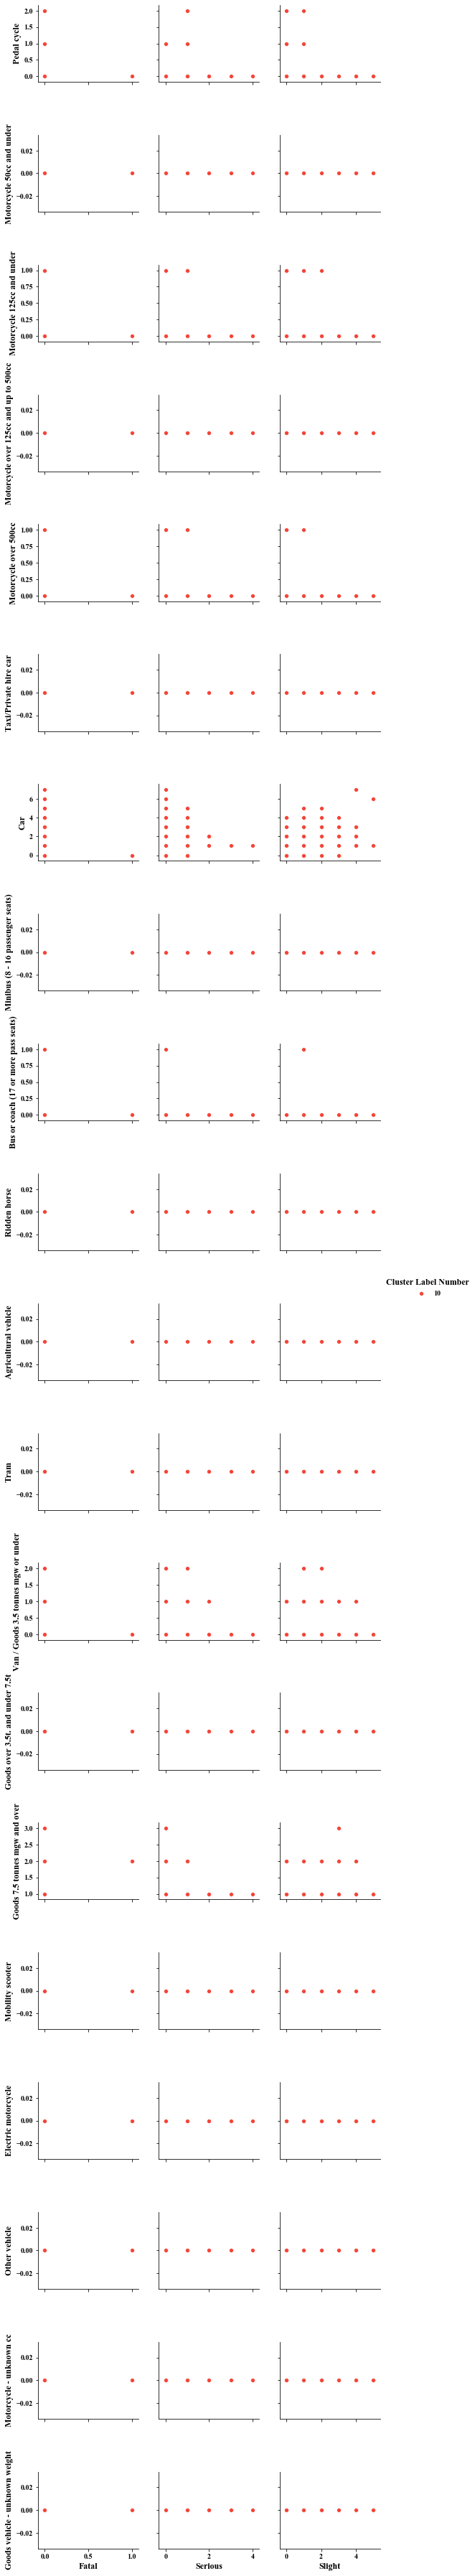

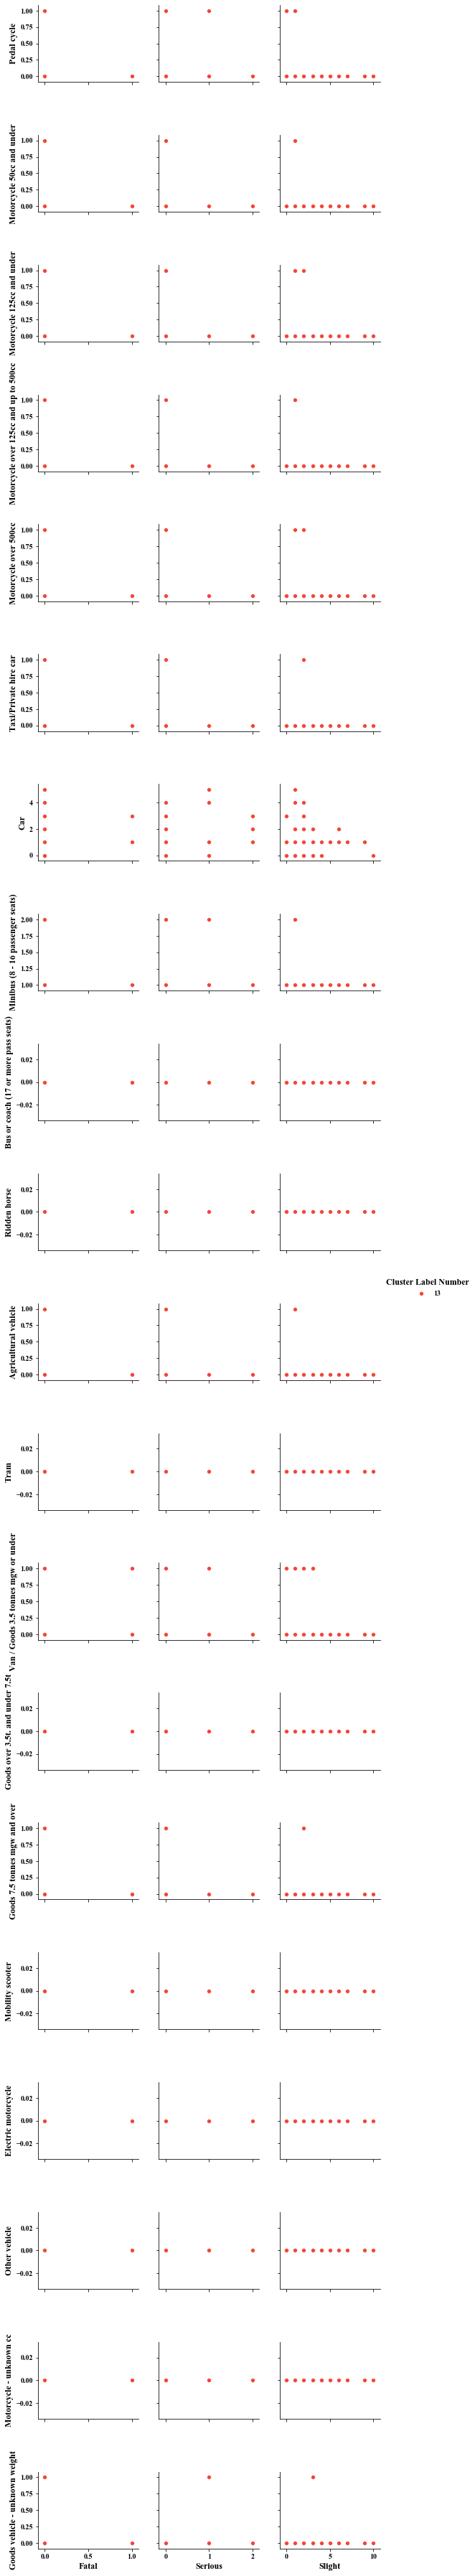

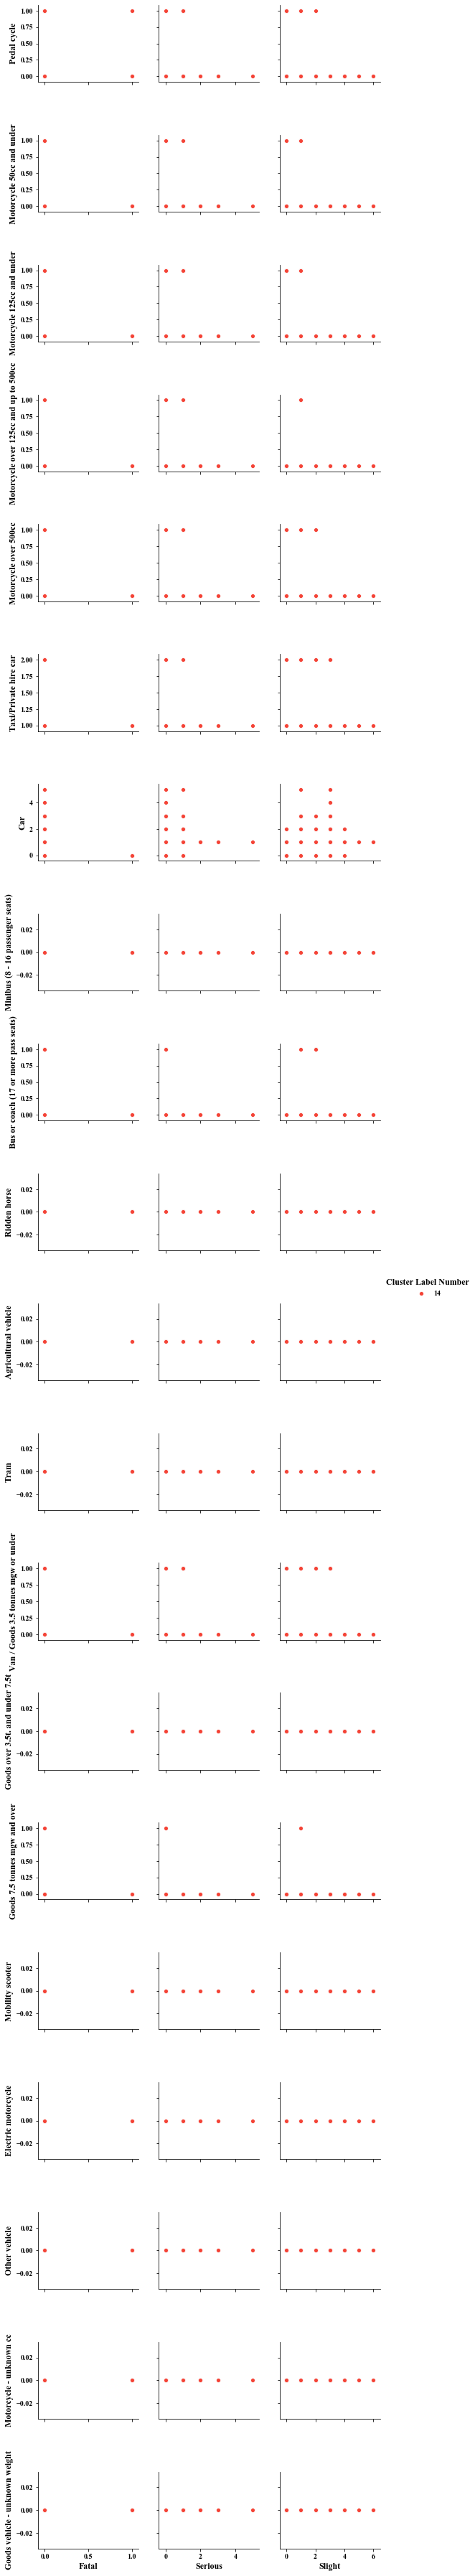

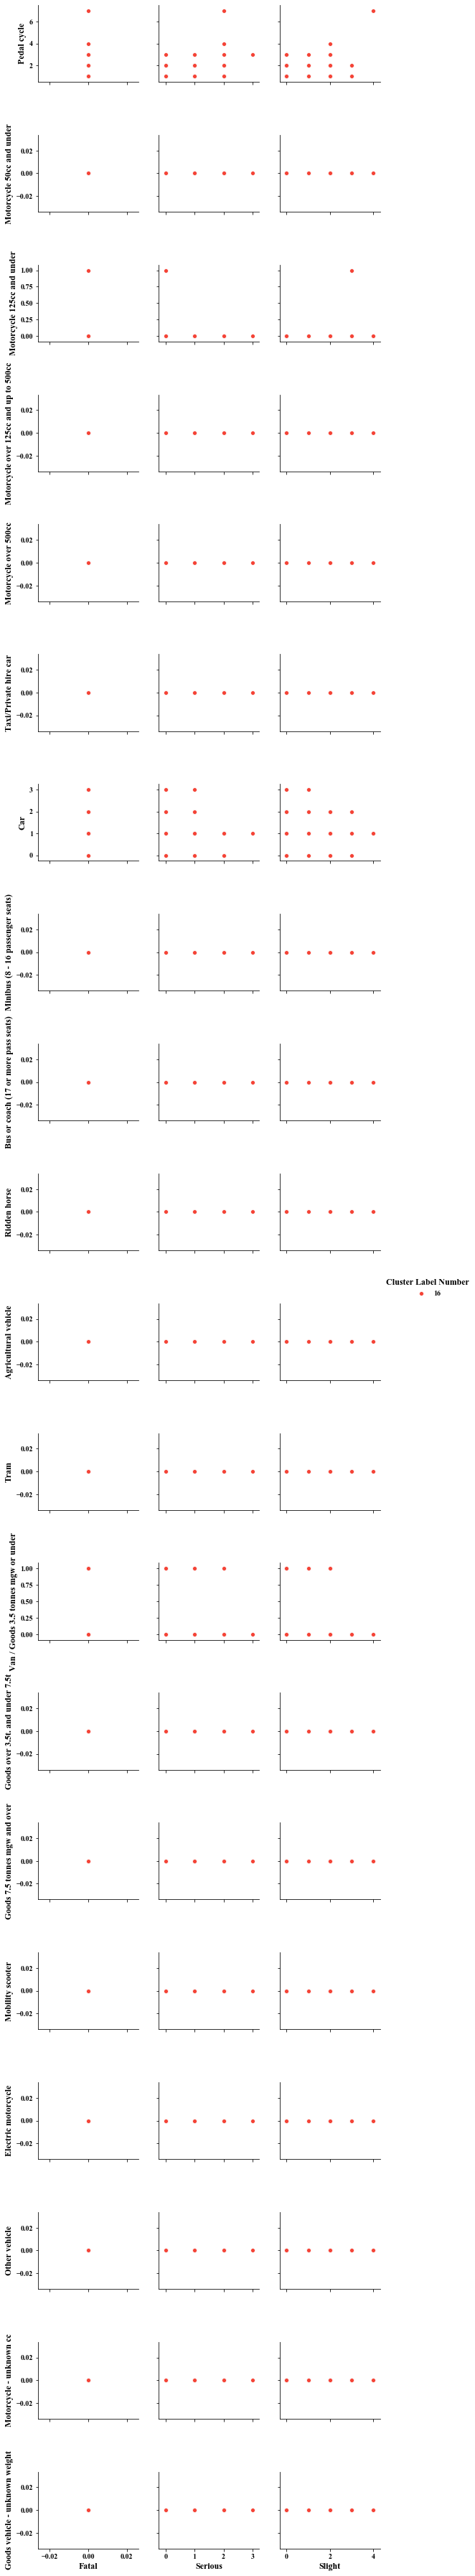

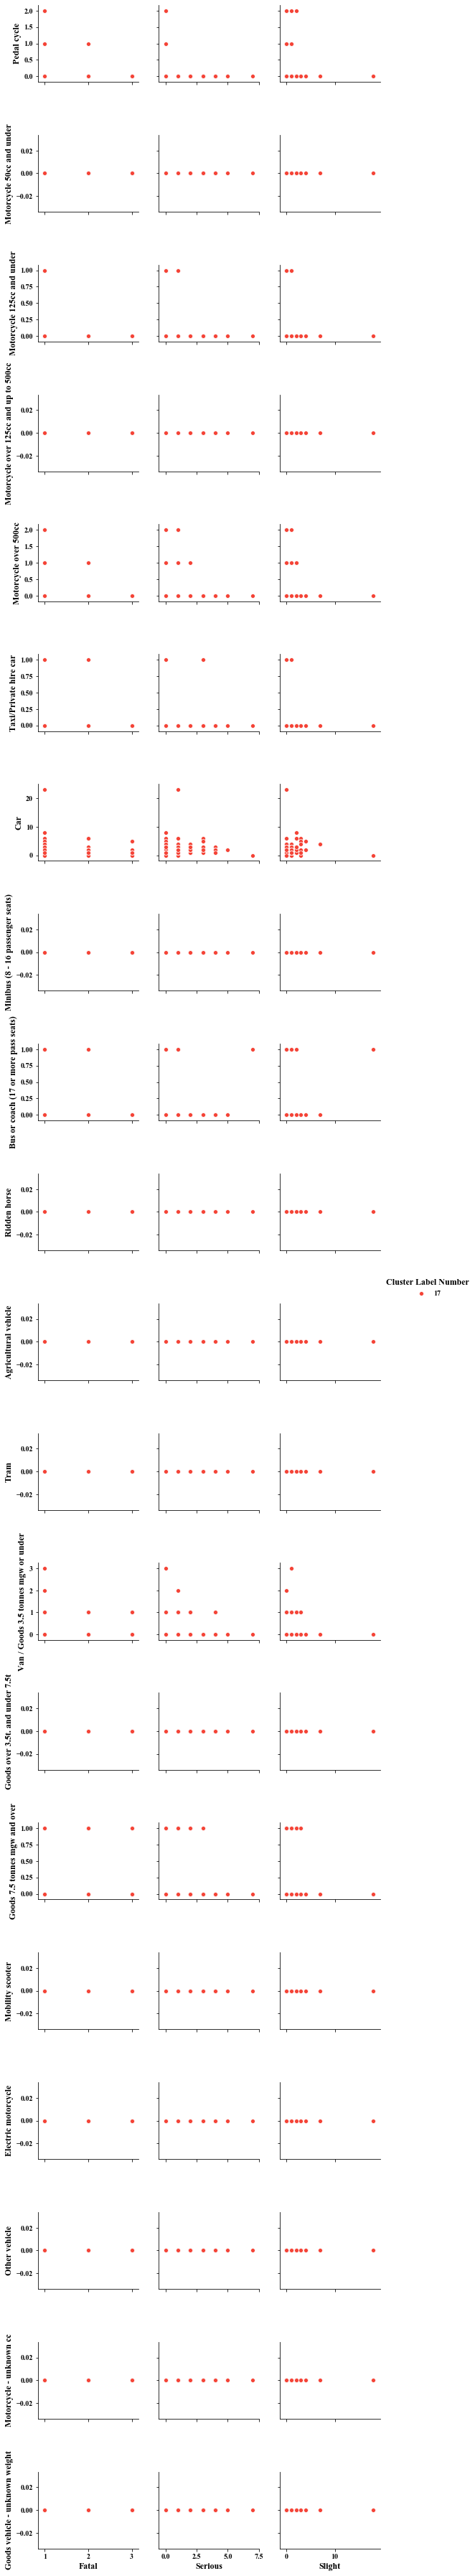

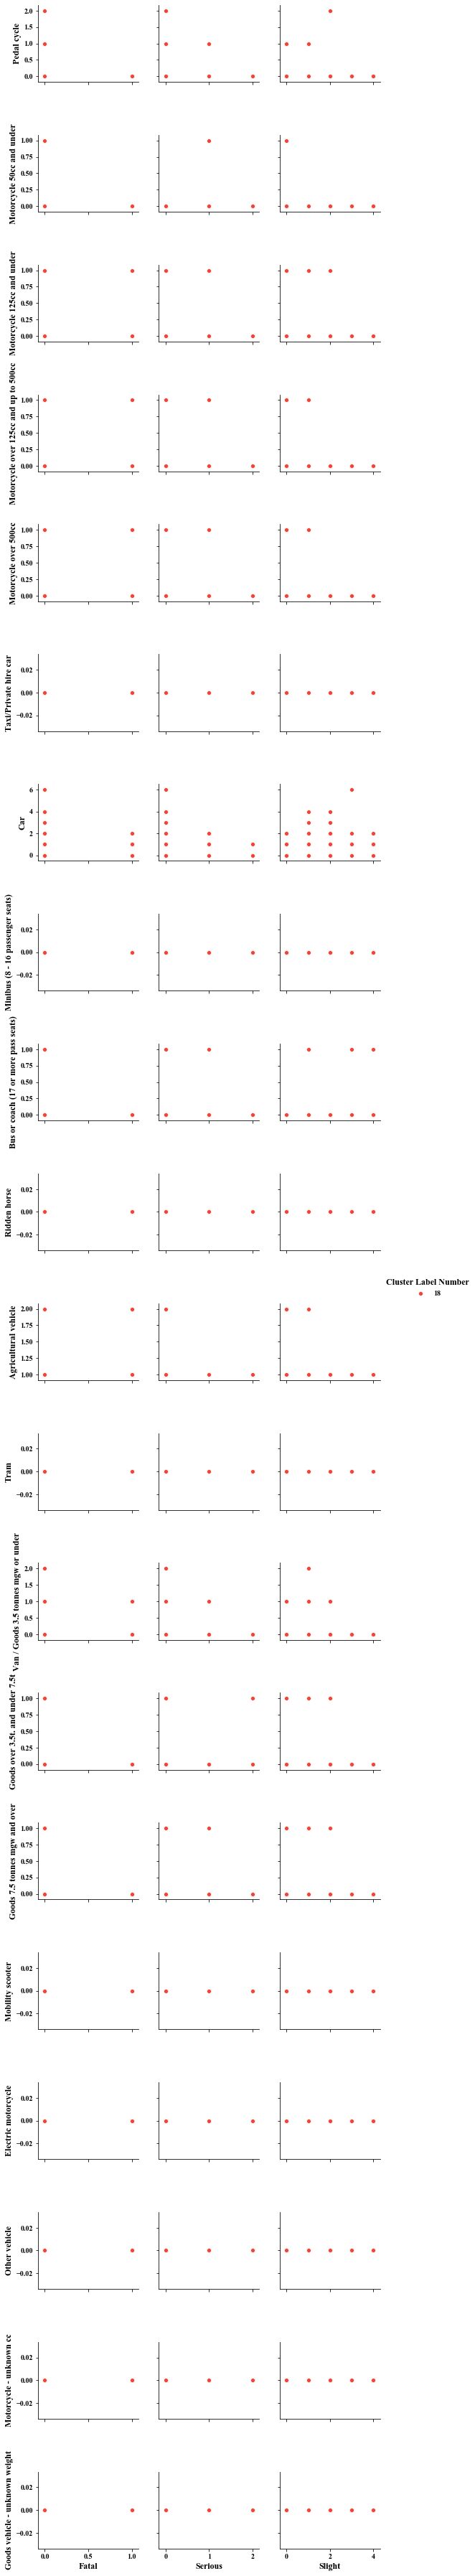

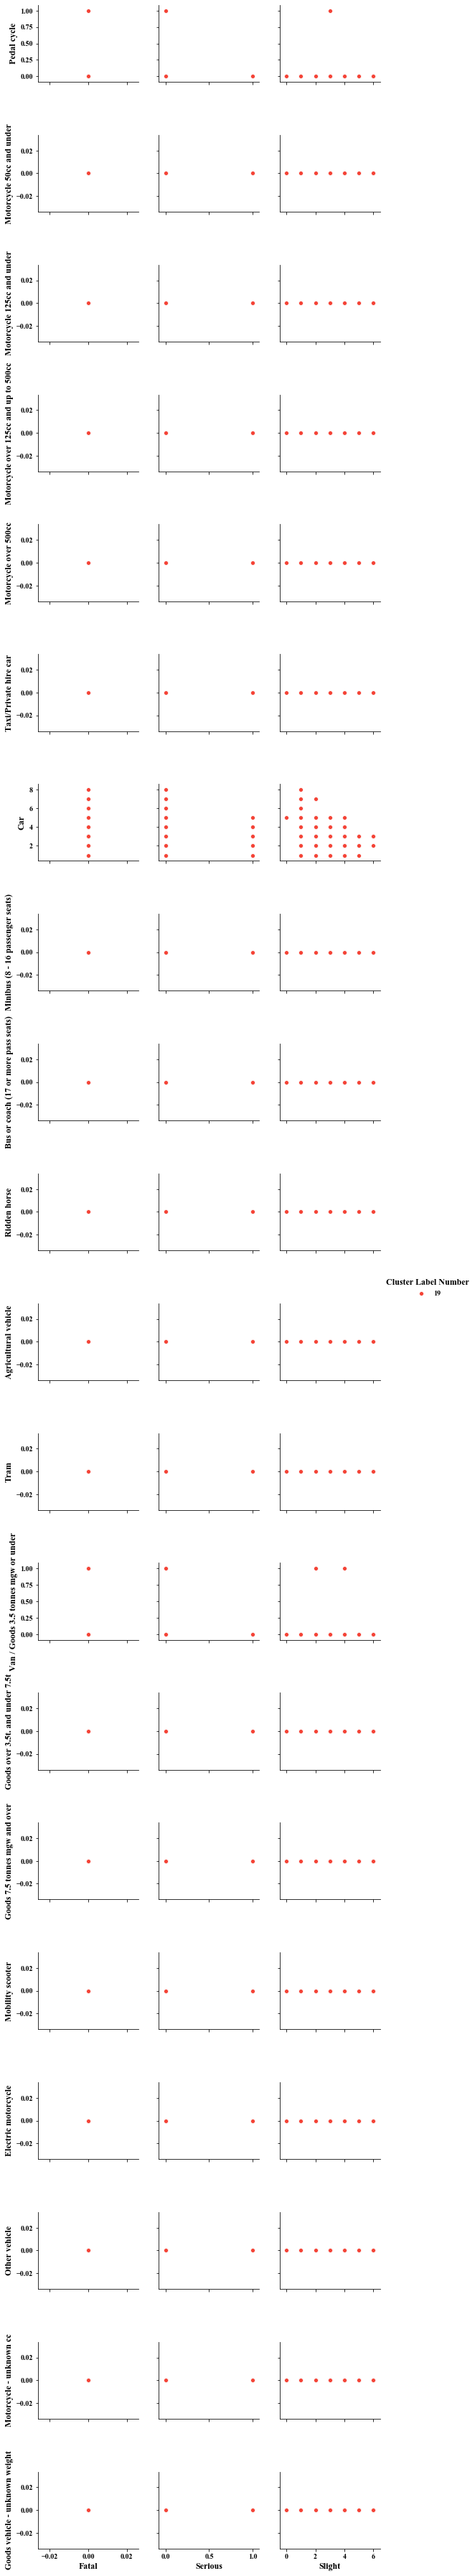

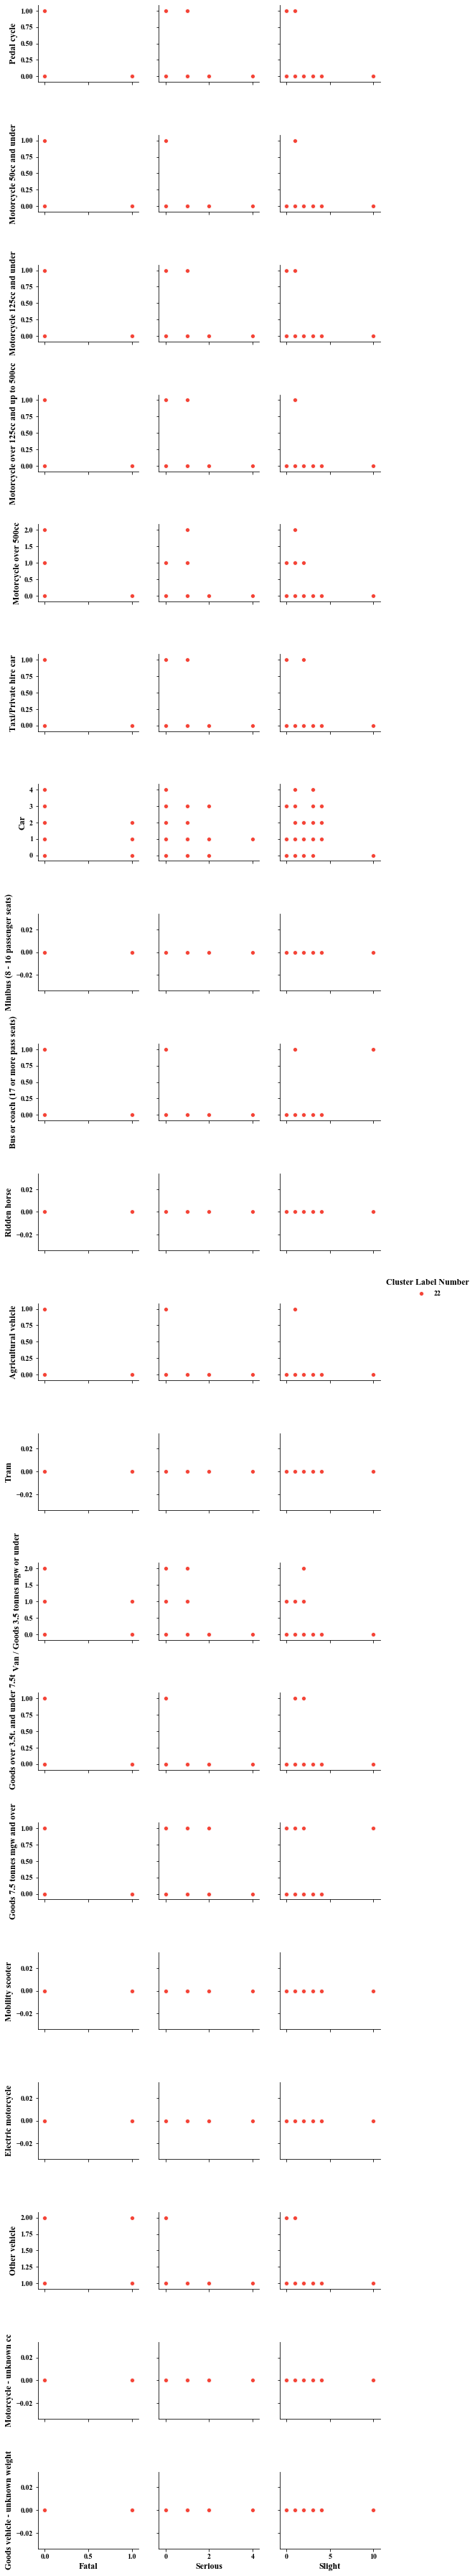

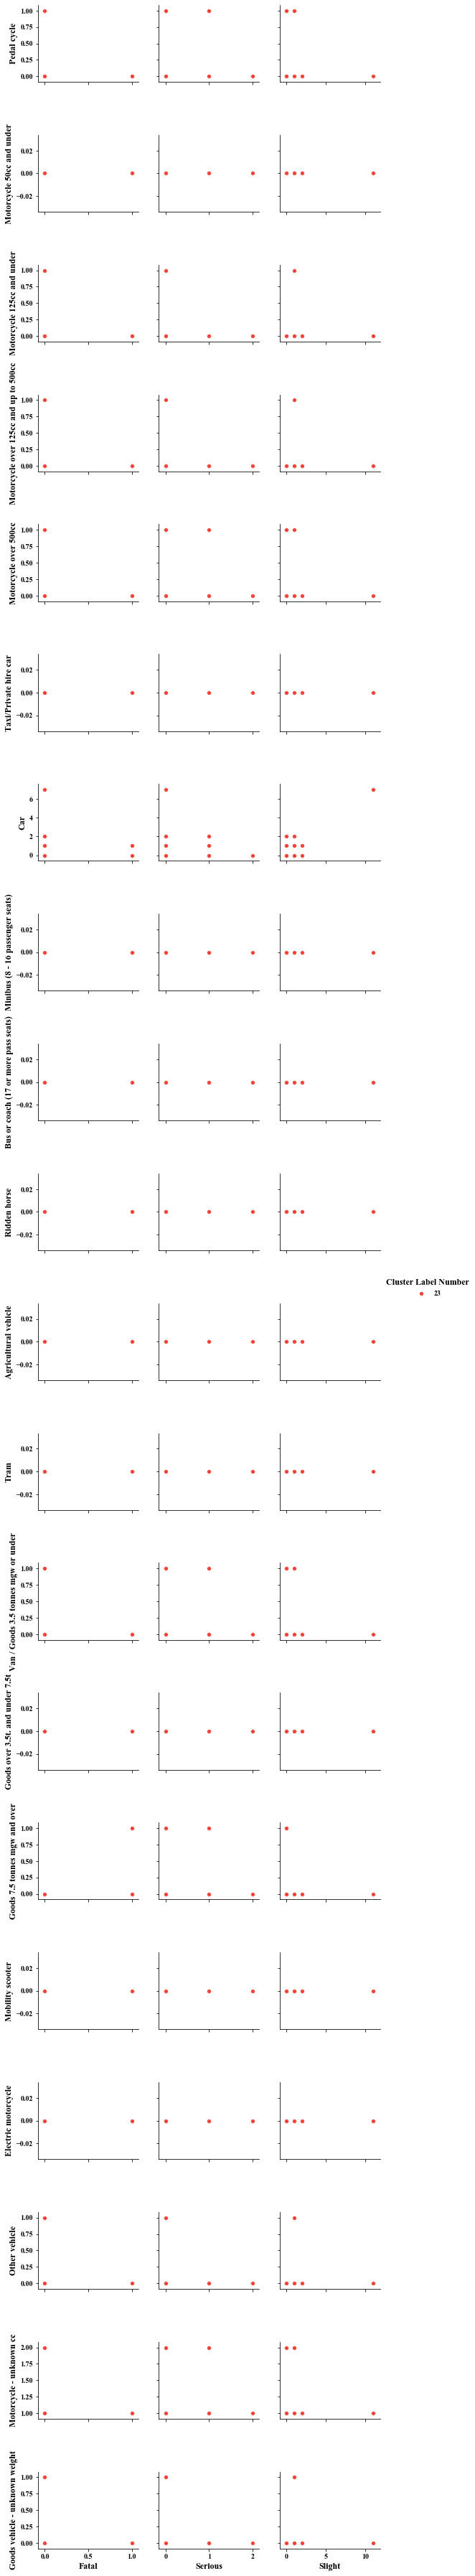

In [25]:
sns.set_palette(sns.color_palette(['#f44336','#e91e63',
                                   '#9c27b0', '#ffc107', '#2196F3', '#03A9F4', '#00BCD4', '#009688']))


for i in range(0,25):
    
    sns_plot = sns.pairplot(accidents_pairplot[accidents_pairplot["Cluster Label Number"]==i],
                 hue="Cluster Label Number",
                 y_vars=['Pedal cycle',
       'Motorcycle 50cc and under', 'Motorcycle 125cc and under',
       'Motorcycle over 125cc and up to 500cc', 'Motorcycle over 500cc',
       'Taxi/Private hire car', 'Car', 'Minibus (8 - 16 passenger seats)',
       'Bus or coach (17 or more pass seats)', 'Ridden horse',
       'Agricultural vehicle', 'Tram', 'Van / Goods 3.5 tonnes mgw or under',
       'Goods over 3.5t. and under 7.5t', 'Goods 7.5 tonnes mgw and over',
       'Mobility scooter', 'Electric motorcycle', 'Other vehicle',
       'Motorcycle - unknown cc', 'Goods vehicle - unknown weight'], x_vars=['Fatal', 'Serious', 'Slight'])
    sns_plot.savefig("Cluster "+str(i)+".png")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


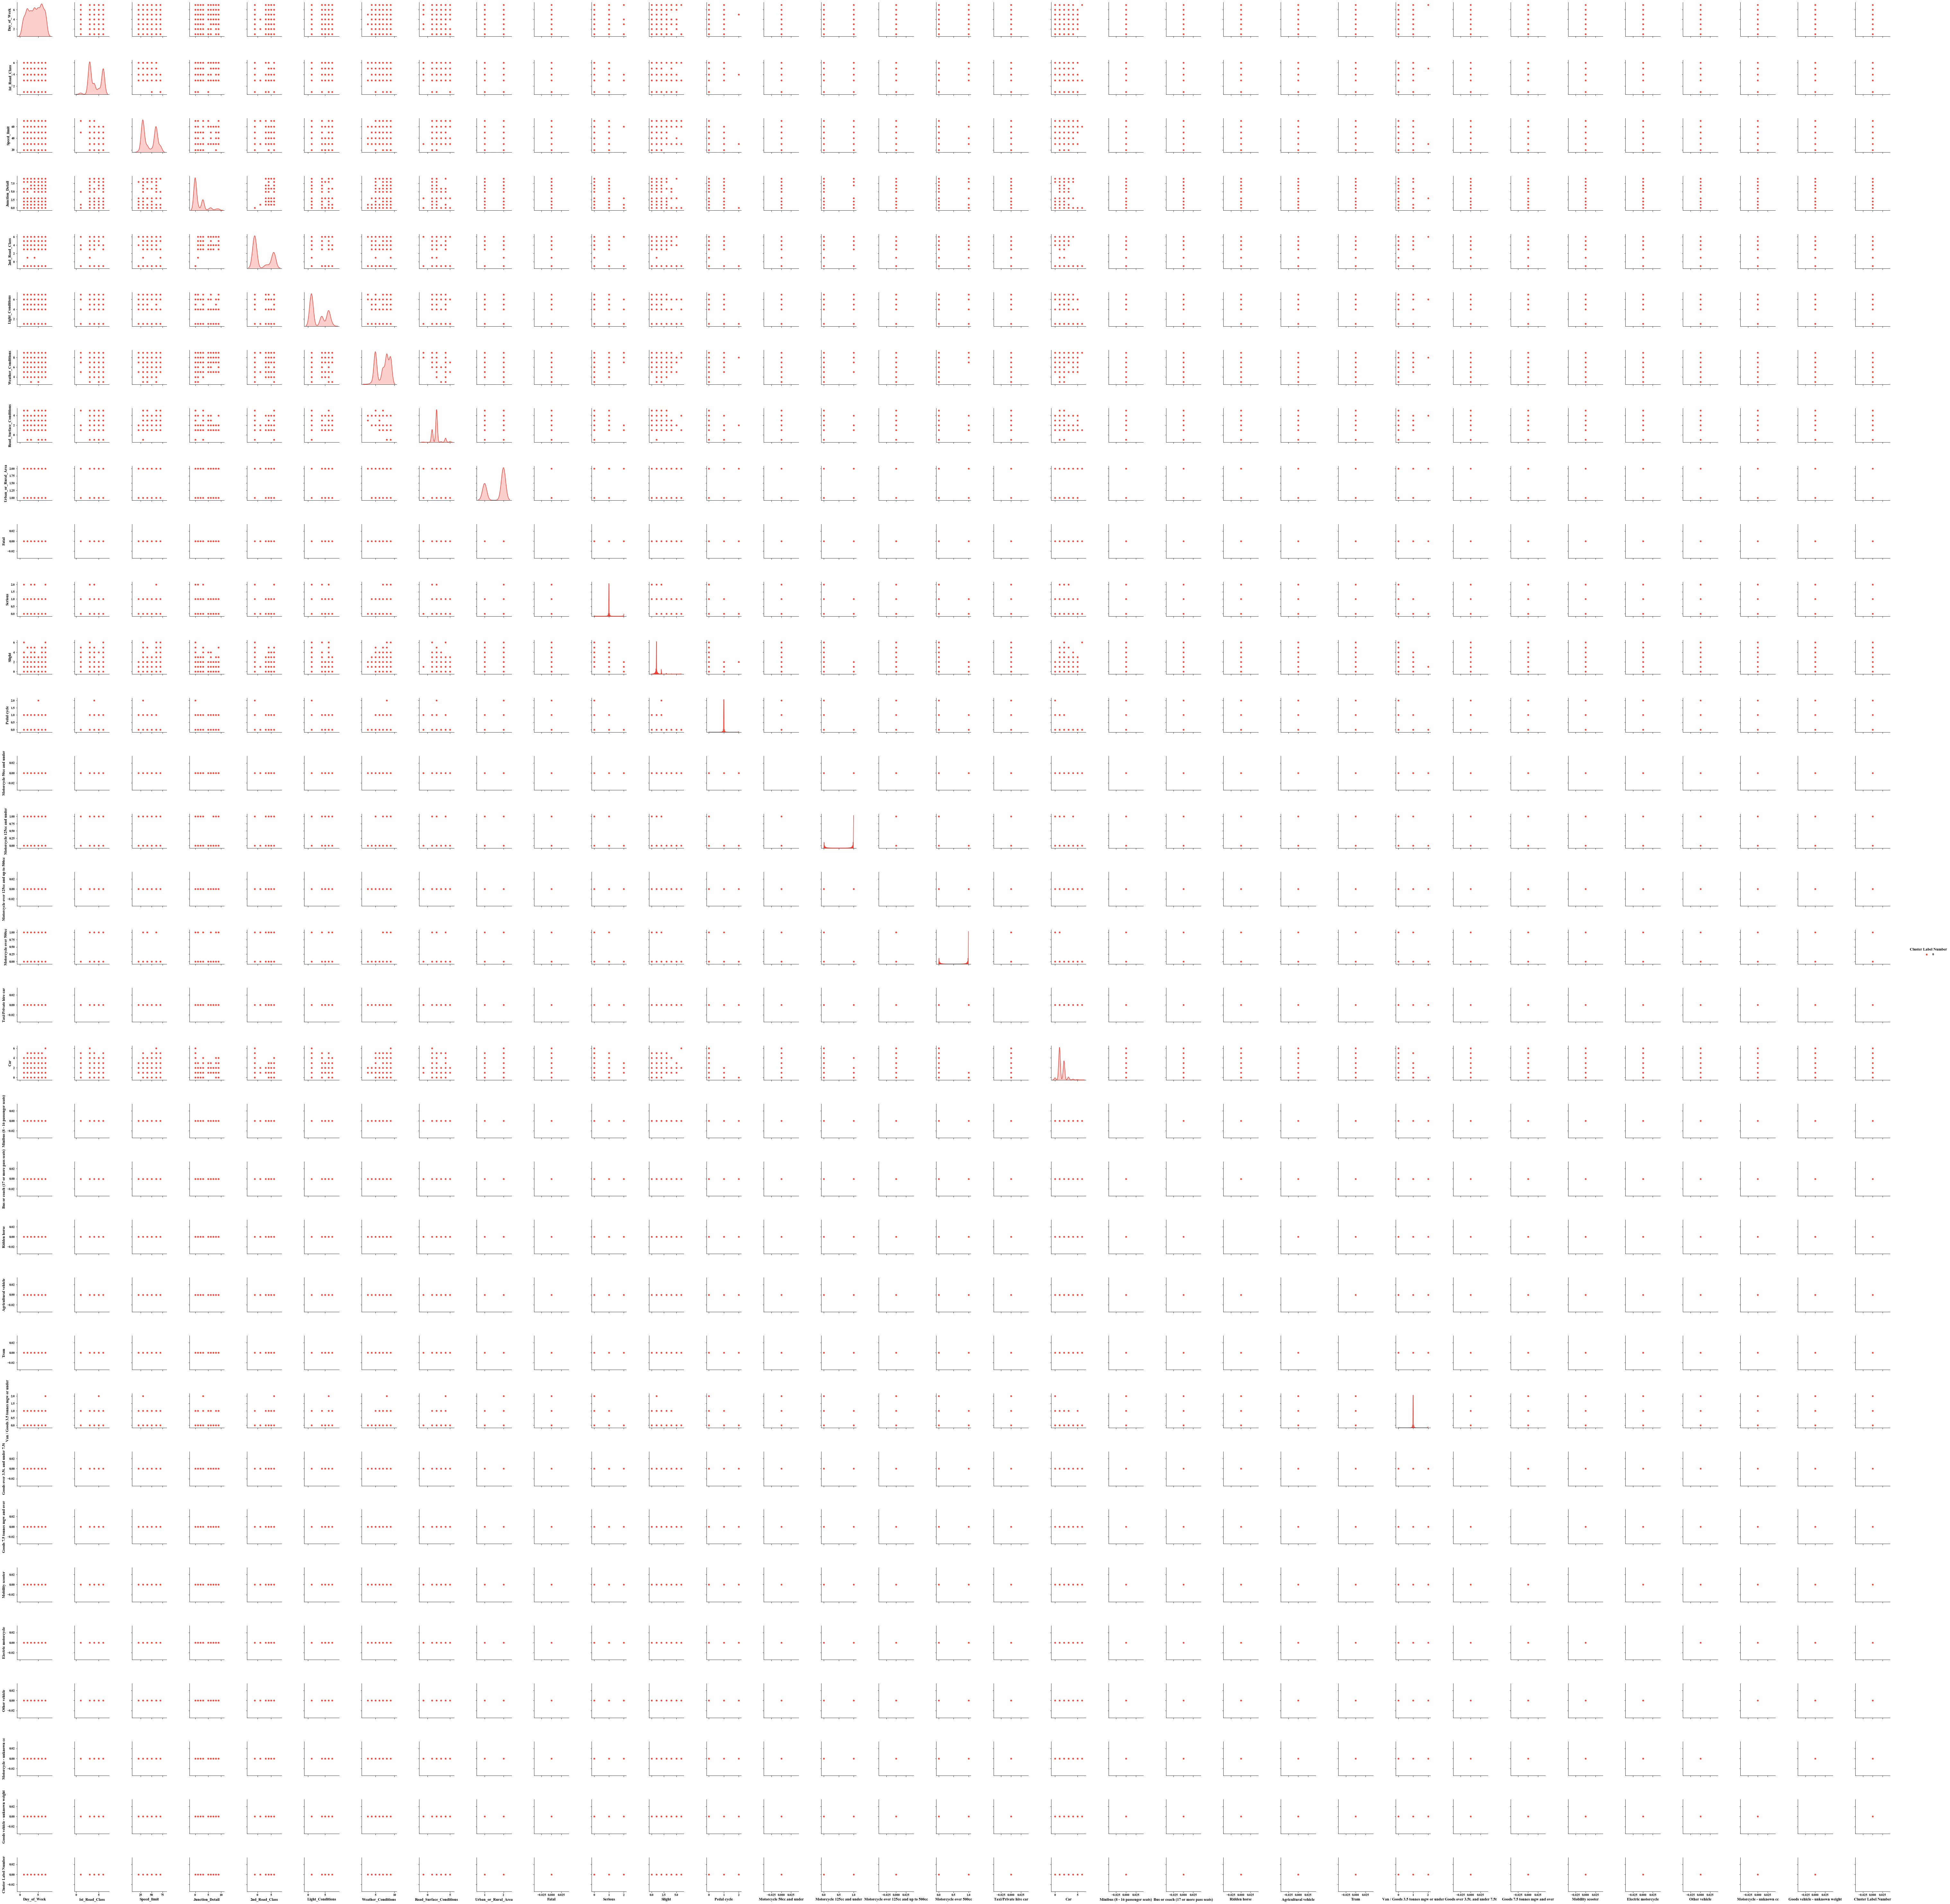

In [27]:
sns_plot = sns.pairplot(accidents_pairplot[accidents_pairplot["Cluster Label Number"]==0],
                 hue="Cluster Label Number",
                 )

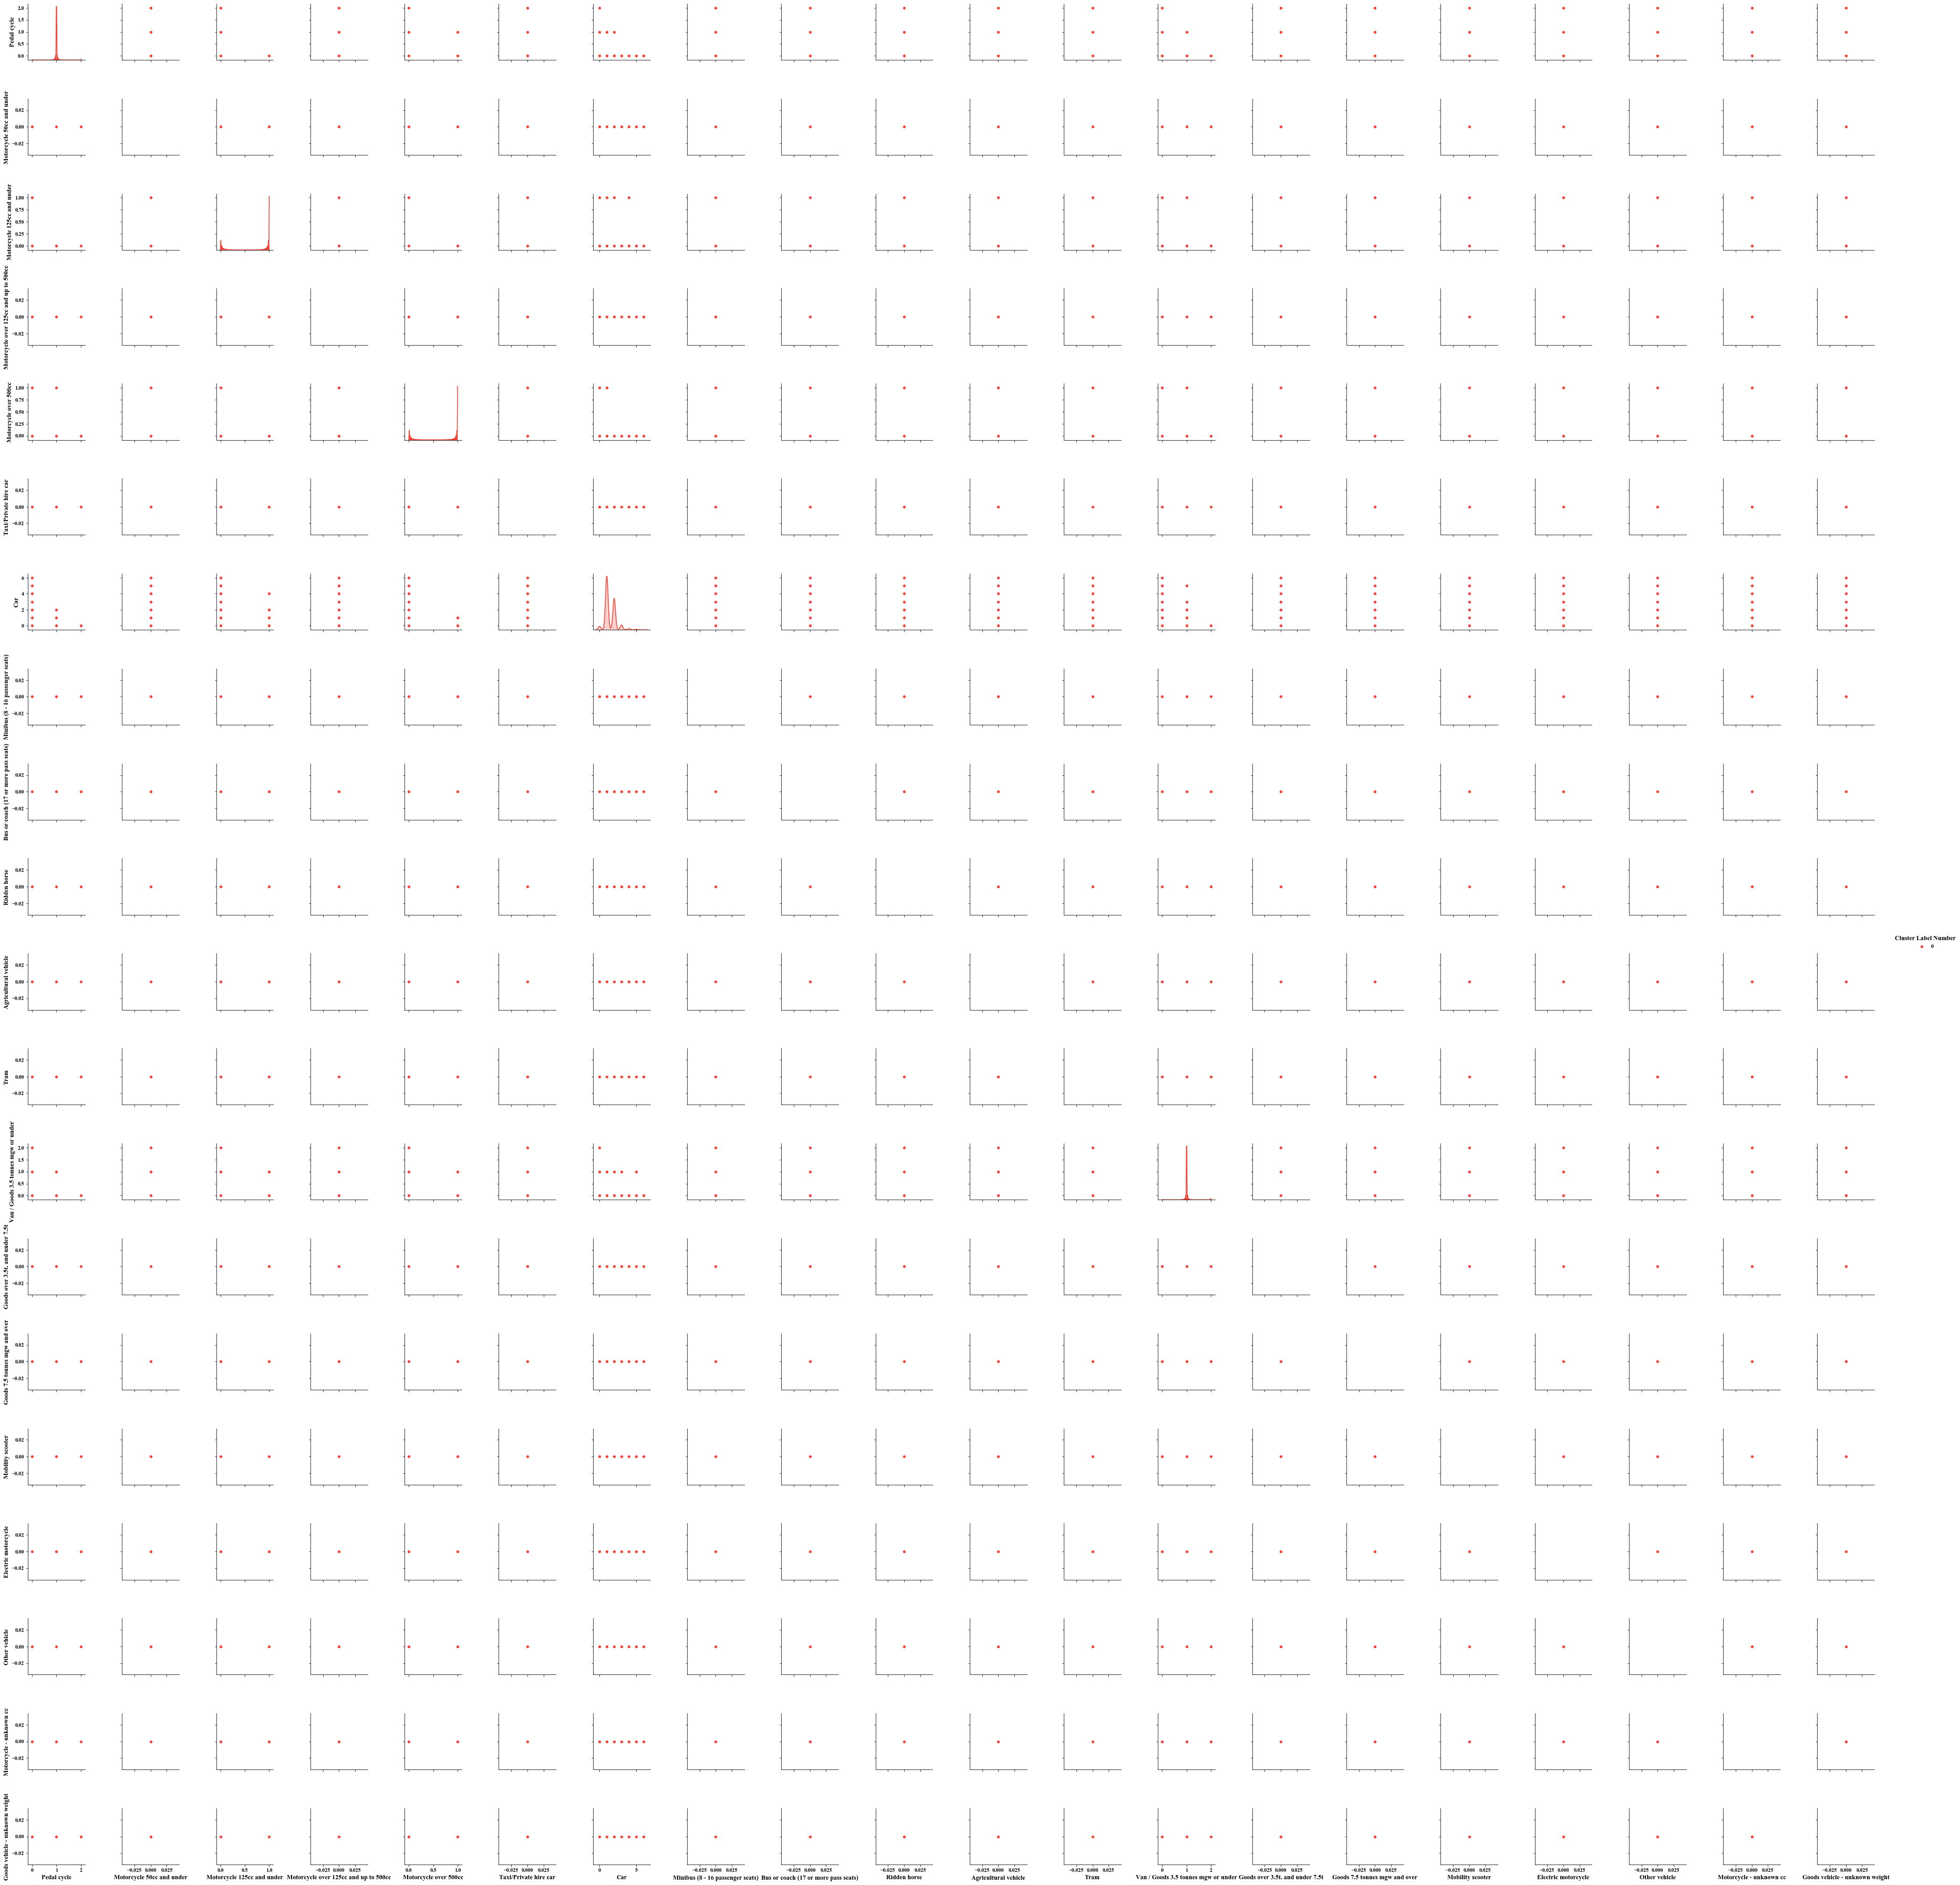

In [29]:
sns_plot = sns.pairplot(accidents_pairplot[accidents_pairplot["Cluster Label Number"]==0],
                 hue="Cluster Label Number",
                 vars=['Pedal cycle',
       'Motorcycle 50cc and under', 'Motorcycle 125cc and under',
       'Motorcycle over 125cc and up to 500cc', 'Motorcycle over 500cc',
       'Taxi/Private hire car', 'Car', 'Minibus (8 - 16 passenger seats)',
       'Bus or coach (17 or more pass seats)', 'Ridden horse',
       'Agricultural vehicle', 'Tram', 'Van / Goods 3.5 tonnes mgw or under',
       'Goods over 3.5t. and under 7.5t', 'Goods 7.5 tonnes mgw and over',
       'Mobility scooter', 'Electric motorcycle', 'Other vehicle',
       'Motorcycle - unknown cc', 'Goods vehicle - unknown weight'])

### PCA

In [ ]:
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

In [ ]:
numSamples, numFeatures = accidents_to_cluster.data.shape
print(numSamples)
print(numFeatures)

In [ ]:
X = accidents_to_cluster.data

n_components=[]
explained_variance=[]
sum_explained_variance=[]

In [ ]:
for n in range(2,32,1):
    pca = PCA(n_components=n, whiten=True).fit(X)
    explained_variance.append(pca.explained_variance_ratio_)
    sum_explained_variance.append(sum(pca.explained_variance_ratio_))

In [ ]:
sum_explained_variance

In [ ]:
rcParams["axes.titlesize"] = 16
rcParams["axes.labelsize"] = 'large'

fig, ax = plt.subplots()
#ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(labelsize=16 )
ax.grid(True)

plt.plot(range(2,32,1), sum_explained_variance, '-', color='#37474F', markersize=6)
plt.plot(2, sum_explained_variance[0], '-o', color='#e91e63', markersize=18, alpha=0.8)

plt.ylim(0,1.05)
plt.xlim(0,33)
plt.xlabel(r'Number of dimensions', fontsize=18)
plt.ylabel('Explained Variance', fontsize=18);

#plt.savefig("C:\\Projects\\0_Training\\AU_MLAI\\IndividualProject\\figures\\" + "Elbow_plot", dpi=150, format='jpg')
#plt.figure(figsize=(16, 6))

In [ ]:
pca = PCA(n_components=2, whiten=True).fit(X)

In [ ]:
accidents_pca = pca.transform(X)
pca.explained_variance_ratio_

In [ ]:
## Eigen vectors
pca.components_

In [ ]:
len(accidents_pca)
accidents_pca_df = pd.DataFrame(accidents_pca, columns=["PCA X", "PCA Y"])
accidents_pca_df["K Means Label"] = k_means.labels_
accidents_pca_df.head()

In [ ]:
sns.scatterplot(x="PCA X", y="PCA Y", data=accidents_pca_df, hue="K Means Label")

### DBSCAN

In [ ]:
dbcluster = dbscan